![tf2](https://miro.medium.com/max/1000/1*RGSPW8Zfs4W70SYrIu3xFA.png)

**The CIFAR-10 dataset*()

![](https://sichkar-valentyn.github.io/cifar10/images/CIFAR-10_examples.png)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [96]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [97]:
import os
import random as rn

os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(12345)
tf.random.set_seed(12345)

# New Section

In [98]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to a pixel value range of [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [99]:
# The data, split between train and test sets:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

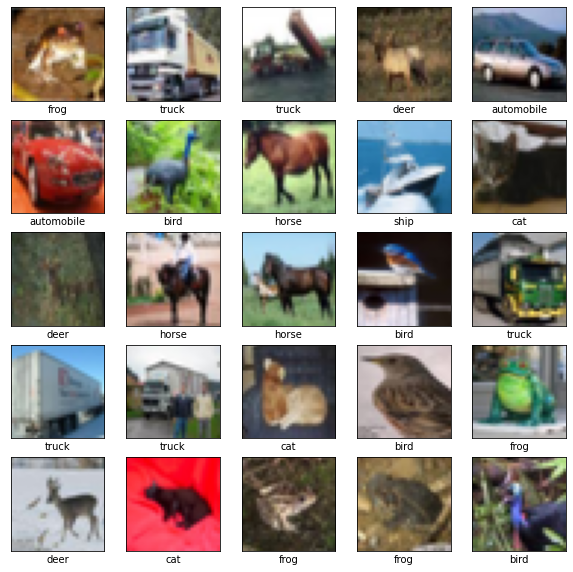

In [100]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [101]:
# # Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [102]:
# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [103]:
# Define a ModelCheckpoint callback to persist the model after every epoch.
cp_callback = tf.keras.callbacks.ModelCheckpoint('checkpoint.hdf5', verbose=1, save_weights_only=True, 
                                                 monitor='val_accuracy', mode='max', save_best_only=True)

In [104]:
# Compile, i.e. configure the network with the Adam optimizer and the sparse_categorical_crossentropy loss.
# Furthermore, keep track of the model's accuracy metric and have it printed out during training.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:
# Actually train the model for 15 epochs, i.e. show the model all the training data 15 times.
# To be able to judge the model's performance, also provide the test data. It will be evaluated after
# every epoch and the results will be printed to the console.
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[cp_callback])

Epoch 1/20
1559/1563 [============================>.] - ETA: 0s - loss: 2.0991 - accuracy: 0.3534
Epoch 00001: val_accuracy improved from -inf to 0.39330, saving model to checkpoint.hdf5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0989 - accuracy: 0.3536 - val_loss: 2.0596 - val_accuracy: 0.3933
Epoch 2/20
1547/1563 [============================>.] - ETA: 0s - loss: 2.0001 - accuracy: 0.4570
Epoch 00002: val_accuracy improved from 0.39330 to 0.49790, saving model to checkpoint.hdf5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9997 - accuracy: 0.4575 - val_loss: 1.9591 - val_accuracy: 0.4979
Epoch 3/20
1560/1563 [============================>.] - ETA: 0s - loss: 1.9440 - accuracy: 0.5135
Epoch 00003: val_accuracy improved from 0.49790 to 0.54380, saving model to checkpoint.hdf5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9438 - accuracy: 0.5136 - val_loss: 1.9166 - val_accuracy: 0.5438
Epoch 4/20
1562/1563 [============

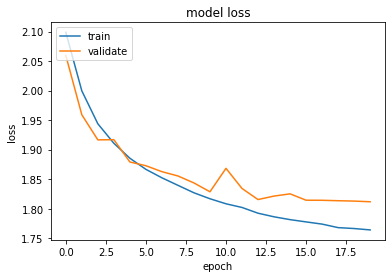

In [106]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [107]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/TF2/testing_2.jpeg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img2 = img

Text(0.5, 1.0, 'This is my testing image')

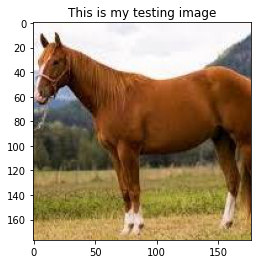

In [108]:
plt.imshow(img2)
plt.title("This is my testing image")

In [109]:
img = img.resize((32,32))
img = np.array(img, dtype=np.float32)
img /= 255

In [110]:
prob = model.predict(img.reshape(1,32,32,3))
prob

array([[1.1602516e-28, 0.0000000e+00, 6.6697560e-37, 0.0000000e+00,
        1.3599228e-27, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [111]:
label = {
0 : 'airplane',
1 : 'automobile',
2 : 'bird',
3 : 'cat',
4 : 'deer',
5 : 'dog',
6 : 'frog',
7 : 'horse',
8 : 'ship',
9 : 'truck'
}

Text(0.5, 1.0, 'This is a(n) horse!')

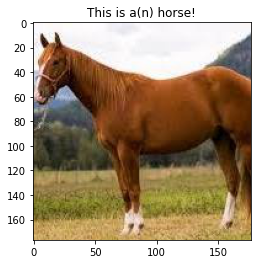

In [112]:
predict_class = np.argmax(prob, axis=1)

plt.imshow(img2)
plt.title("This is a(n) " + label[predict_class[0]] + "!")